In [1]:
#Importing dataset

import pandas as pd
hr_df = pd.read_csv("D:\Data Science and Deep Learning for Business\datascienceforbusiness-master\hr_data.csv")

print(hr_df.info())
print("\n",hr_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB
None

 (14999, 9)


In [2]:
#view categorical data and viewing their unique value

print(hr_df.select_dtypes(exclude=['int', 'float']).columns)
print("\n",hr_df['department'].unique())
print("\n",hr_df['salary'].unique())

Index(['department', 'salary'], dtype='object')

 ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

 ['low' 'medium' 'high']


In [3]:
#loading employee satisfication dataset 

emp_stats = pd.read_excel("D:\Data Science and Deep Learning for Business\datascienceforbusiness-master\employee_satisfaction_evaluation.xlsx")
emp_stats.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [4]:
#joining two datasets based on employee id column
main_df = hr_df.set_index('employee_id').join(emp_stats.set_index('EMPLOYEE #'))
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [5]:
#flattening the dataset after merge
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [6]:
#checking any NULL values or missing values
print(main_df.isnull().sum())
#viewing null value records
main_df[main_df.isnull().any(axis=1)]



employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [7]:
#filling missing value with mean values
main_df.fillna(main_df.mean(numeric_only=True),inplace=True)
main_df.head()


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [8]:
# Removing employee ID feature
main_df_final = main_df.drop(columns='employee_id')
#print(main_df_final.head())
#viewing target column counts
print(main_df_final['left'].value_counts())
# 1 - employee left; 0 - employee not lest

0    11428
1     3571
Name: left, dtype: int64


In [9]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [10]:
#splitting the data

from sklearn.model_selection import train_test_split

#Removing target column
X = main_df_final.drop(['left'],axis=1).values
# Assigning target column
y = main_df_final['left'].values
# Splittng the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print("\nConfusion Matrix\n",confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



Accuracy 78.47%

Confusion Matrix
 [[3142  249]
 [ 720  389]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3391
           1       0.61      0.35      0.45      1109

    accuracy                           0.78      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.76      0.78      0.76      4500



In [13]:
#Deep Learning
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu',input_dim=18,  kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3))


model2.add(Dense(1, activation='sigmoid'))

model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 270)               5130      
                                                                 
 dropout (Dropout)           (None, 270)               0         
                                                                 
 dense_1 (Dense)             (None, 180)               48780     
                                                                 
 dropout_1 (Dropout)         (None, 180)               0         
                                                                 
 dense_2 (Dense)             (None, 90)                16290     
                                                                 
 dropout_2 (Dropout)         (None, 90)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [14]:
# training
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.6867 - accuracy: 0.9007 - val_loss: 0.2846 - val_accuracy: 0.9498
Epoch 2/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2869 - accuracy: 0.9377 - val_loss: 0.2444 - val_accuracy: 0.9507
Epoch 3/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2734 - accuracy: 0.9380 - val_loss: 0.2374 - val_accuracy: 0.9524
Epoch 4/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2638 - accuracy: 0.9403 - val_loss: 0.2247 - val_accuracy: 0.9593
Epoch 5/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2578 - accuracy: 0.9412 - val_loss: 0.2338 - val_accuracy: 0.9476
Epoch 6/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2582 - accuracy: 0.9409 - val_loss: 0.2297 - val_accuracy: 0.9507
Epoch 7/25
1050/1050 [==============================] - 5s 5ms/step - loss: 0.2546 - accuracy: 0.9412 - val_loss: 0.2206 - val_accuracy:

In [15]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 2ms/step
[[3334   57]
 [ 163  946]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3391
           1       0.94      0.85      0.90      1109

    accuracy                           0.95      4500
   macro avg       0.95      0.92      0.93      4500
weighted avg       0.95      0.95      0.95      4500



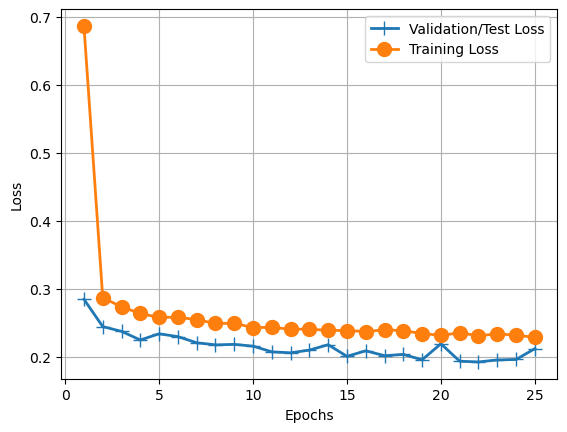

In [16]:
# loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = 'o', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

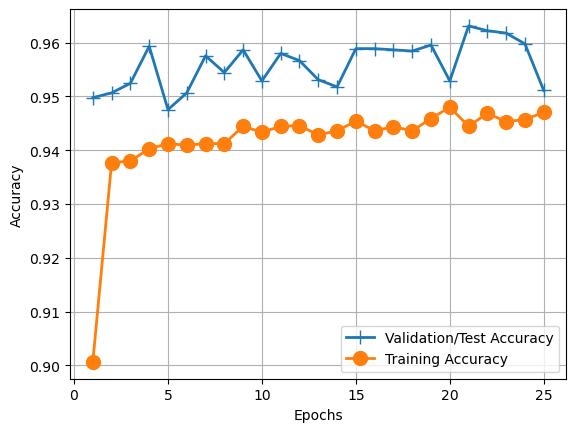

In [17]:
# accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = 'o', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()